# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 2. Методы нахождения оценок

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [4]:
params = np.arange(-1000, 1000, 0.01, dtype=float)

In [5]:
N = 10
arg_max_params_first = np.argmax(np.array([np.sum(np.log(sps.cauchy.pdf(sample_1[:N], loc=params[i]))) for i in range(0, len(params))]))
estimator_first = params[arg_max_params_first]
print("Оценка параметра сдвига при первых 10 измерениях: ", estimator_first)

Оценка параметра сдвига при первых 10 измерениях:  208.52999999890085


In [6]:
params = np.arange(100, 300, 0.01, dtype=float)

In [7]:
N = 100
arg_max_params_second = np.argmax(np.array([np.sum(np.log(sps.cauchy.pdf(sample_1[:N], loc=params[i]))) for i in range(0, len(params))]))
estimator_second = params[arg_max_params_second]
print("Оценка параметра сдвига при первых 100 измерениях: ", estimator_second)

Оценка параметра сдвига при первых 100 измерениях:  207.9000000000552


In [8]:
params = np.arange(100, 250, 0.01, dtype=float)

In [9]:
arg_max_params_third = np.argmax(np.array([np.sum(np.log(sps.cauchy.pdf(sample_1, loc=params[i]))) for i in range(0, len(params))]))
estimator_third = params[arg_max_params_third]
print("Оценка параметра сдвига при всех измерениях: ", estimator_third)

Оценка параметра сдвига при всех измерениях:  207.98000000005524


Сравните полученные результаты с `sps.cauchy.fit`

In [10]:
estimator_fit = sps.cauchy.fit(sample_1)[0]
print("Оценка параметра сдвига используя метод fit: ", estimator_fit)

Оценка параметра сдвига используя метод fit:  207.97772827944334


__Вывод__:  Самодельная функция правдоподобия выдала очень близкий результат. Видим, что чем больше измерений мы используем в нашей написанной руками функции правдоподобия, тем ближе к правильной получается оценка. При всех измерениях она почти такая же как нам выдал sps.cauchy.fit

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [3]:
sample_2 = np.loadtxt("Weibull.csv")

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


/tmp/ipykernel_7907/848494949.py:12: RuntimeWarning: divide by zero encountered in log
  log_y_last = np.log(-1 * np.log(-1 * ecdf_waibull(sample_2[1461:]) + 1))


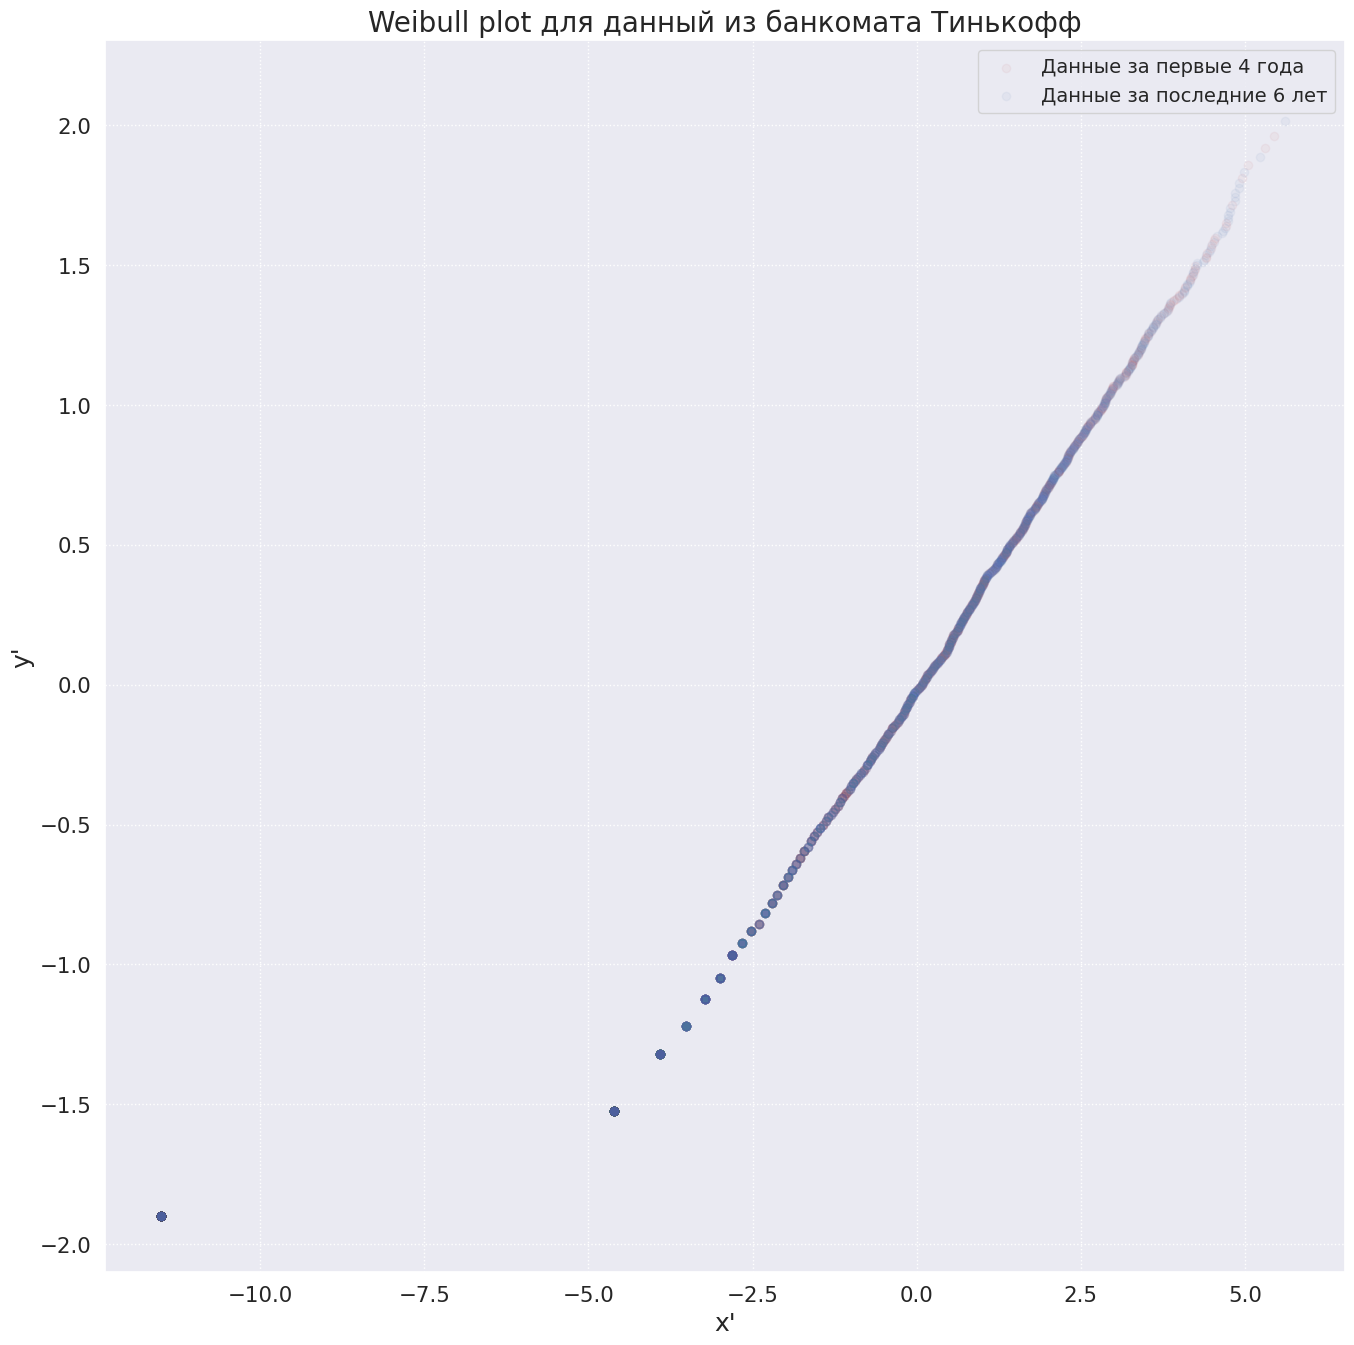

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_waibull = ECDF(sample_2)

#Заменим нули на епсилон
sample_2[sample_2 == 0] = 0.00001

log_x = np.log(sample_2)
log_x_first_4 = np.log(sample_2[:1461])
log_y_first_4 = np.log(-1 * np.log(-1 * ecdf_waibull(sample_2[:1461]) + 1))
log_x_last = np.log(sample_2[1461:])
log_y_last = np.log(-1 * np.log(-1 * ecdf_waibull(sample_2[1461:]) + 1))

plt.figure(figsize=(16, 16))
plt.scatter(x=log_x_first_4, y=log_y_first_4, alpha=0.05, c='r', label='Данные за первые 4 года')
plt.scatter(x=log_x_last, y=log_y_last, alpha=0.05, c='b', label='Данные за последние 6 лет')
plt.xlabel('x\'', fontsize=18)
plt.ylabel('y\'', fontsize=18)
plt.title('Weibull plot для данный из банкомата Тинькофф', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

Сделайте вывод.

**Вывод** Так как мы предварительно линеаризовали функцию распределение, то на графике отчетливо видна линия y=x. Значит данные были взяты именно из распределения Вейбулла. Иначе бы точки не находились на прямой y=x. И соотвественно данных за последние 6 лет больше, поэтому и синих точек на графике больше, это значит что показатели сильно не менялись из года в год.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [6]:
params = np.arange(-2, 2, 0.001, dtype=float)

In [8]:
N = 1461
arg_max_params_first = np.argmax(np.array([np.sum(sps.weibull_min.logpdf(sample_2[:N], c=np.power(10, params[i]))) for i in range(0, len(params))]))
estimator_first = np.power(10, params[arg_max_params_first])
print(r'Оценка параметра по первым четырем годам: ', estimator_first)

Оценка параметра по первым четырем годам:  0.3280952931129929


In [9]:
arg_max_params_second = np.argmax(np.array([np.sum(sps.weibull_min.logpdf(sample_2, c=np.power(10, params[i]))) for i in range(0, len(params))]))
estimator_second = np.power(10,params[arg_max_params_second])
print(r'Оценка параметра по всей выборке: ', estimator_second)

Оценка параметра по всей выборке:  0.3221068791282203


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [10]:
estimator_third = sps.weibull_min.fit(sample_2, fscale=1, floc=0)[0]
print(r'Оценка параметра по всей выборке методом fit: ', estimator_third)

Оценка параметра по всей выборке методом fit:  0.32246093749999943


__Вывод__: Получаем такой же результат что и в прошлом задании, при увеличении количества рассматриваемых элементов в выборке, оценка становится все ближе к оценке, полученной с помощью метода fit

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

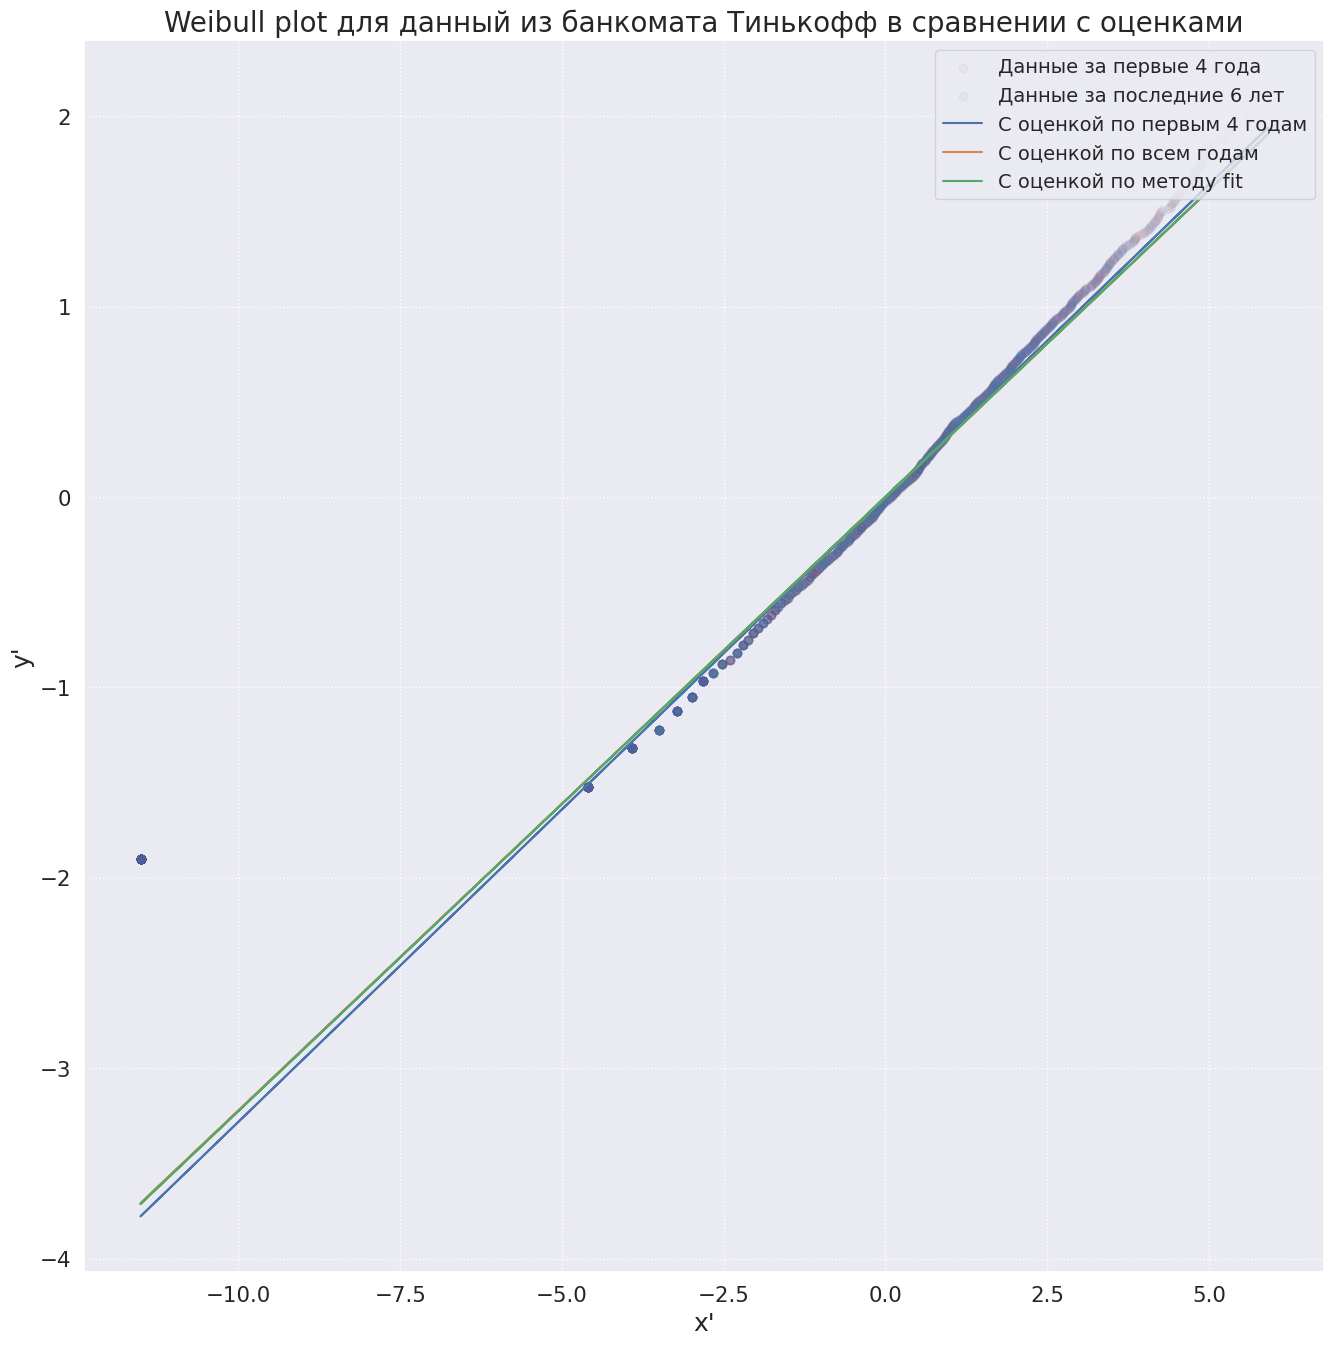

In [11]:
plt.figure(figsize=(16, 16))
plt.scatter(x=log_x_first_4, y=log_y_first_4, alpha=0.05, c='r', label='Данные за первые 4 года')
plt.scatter(x=log_x_last, y=log_y_last, alpha=0.05, c='b', label='Данные за последние 6 лет')
plt.plot(log_x, log_x * estimator_first, label='С оценкой по первым 4 годам')
plt.plot(log_x, log_x * estimator_second, label='С оценкой по всем годам')
plt.plot(log_x, log_x * estimator_third, label='С оценкой по методу fit')
plt.xlabel('x\'', fontsize=18)
plt.ylabel('y\'', fontsize=18)
plt.title('Weibull plot для данный из банкомата Тинькофф в сравнении с оценками', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')

__Вывод__: То что линии совпадают - это хорошо. Значит мы подобрали с помощью метода максимального правдоподобия правильную оценку, что если считать y' с найденным коэффициентом, то линии будут совпадать с линией элементов выборки. Так же за счет того, что мы убрали нули которых не должно быть в выборке, линии совпадают и оценка получилась более точной

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [18]:
theta = 3
N = 1000

sample_norm = sps.norm(loc=0, scale=theta).rvs(size=N)
sample_uniform = sps.uniform(loc=0, scale=theta).rvs(size=N)
sample_gamma = sps.gamma(a=1, scale=theta).rvs(size=N)

Посчитаем оценки, пользуясь известной функицей fit

In [19]:
estimators_norm = np.array([np.array(sps.norm.fit(sample_norm[:n], floc=0, method="MM")) for n in range(1, N + 1)])
estimators_uniform = np.array([np.array(sps.uniform.fit(sample_uniform[:n], floc=0, method="MM")) for n in range(1, N + 1)])
estimators_gamma = np.array([np.array(sps.gamma.fit(sample_gamma[:n], fa=1, method="MM")) for n in range(1, N + 1)])

/home/any/Programs/statistics_practice_mipt/myenv/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:406: RuntimeWarning: invalid value encountered in double_scalars
  return m3 / np.power(m2, 1.5)


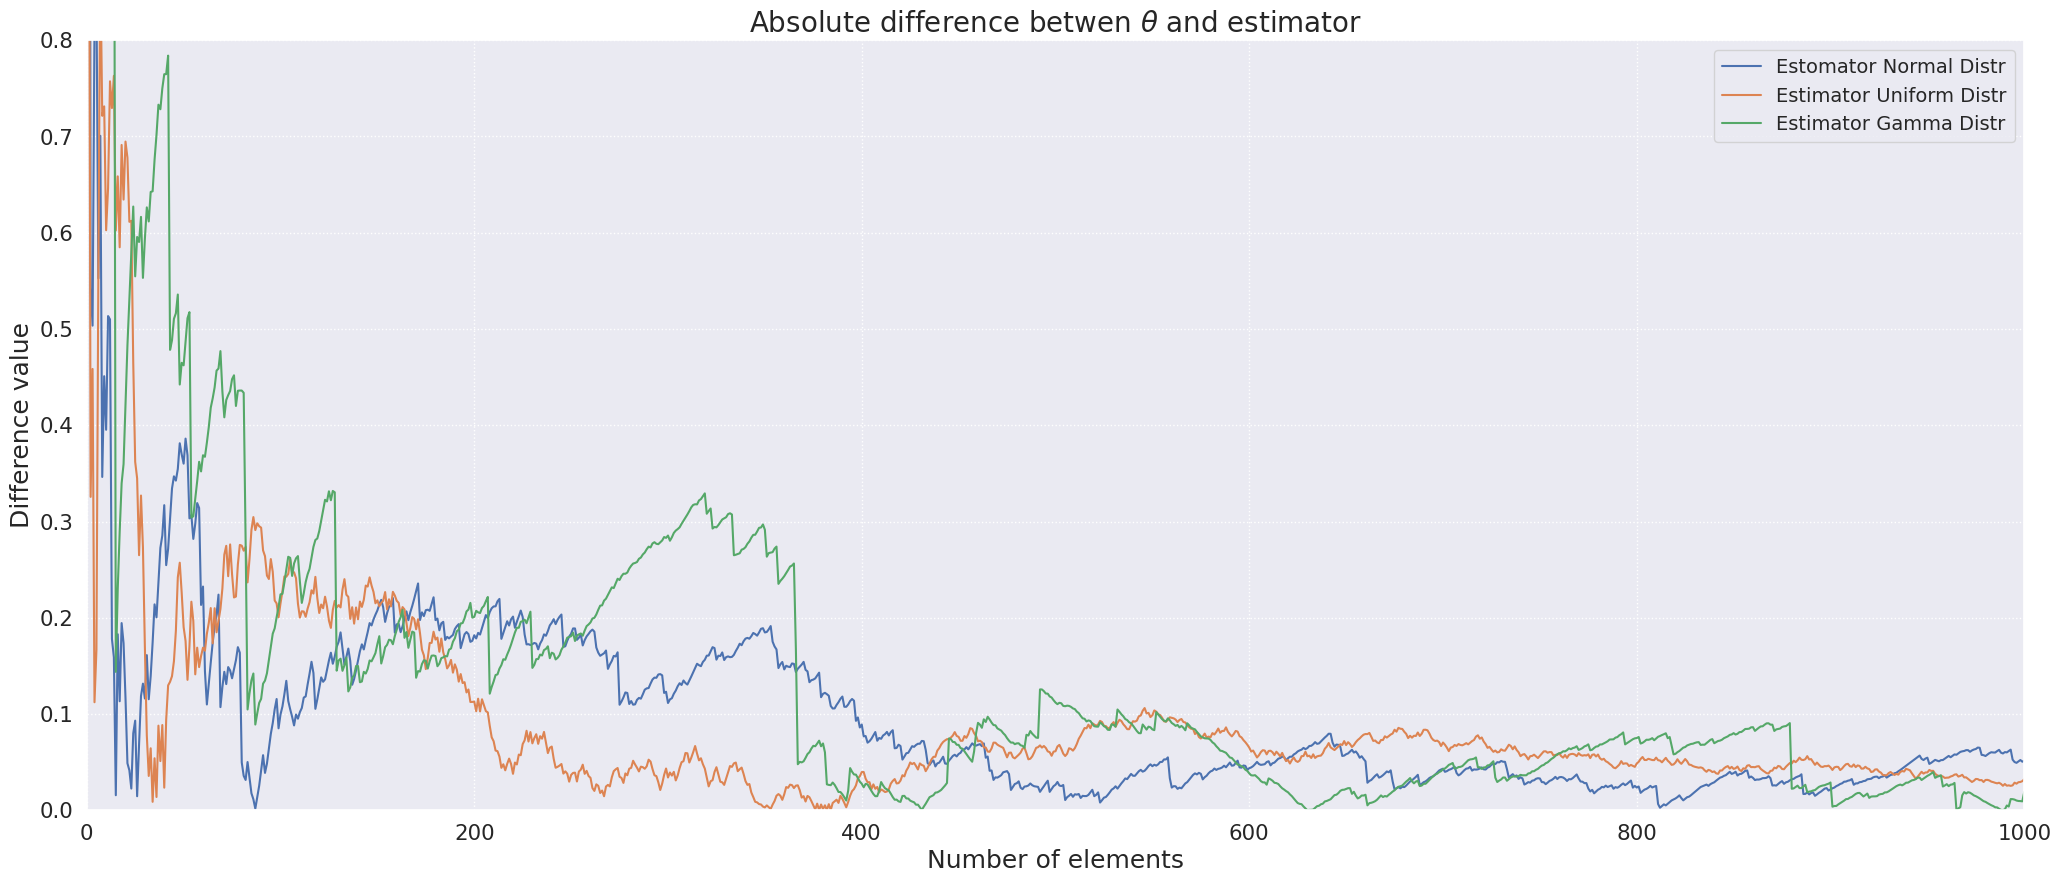

In [20]:
nums_elem = np.arange(1, N+1)
plt.figure(figsize=(25,10))
plt.plot(nums_elem, np.abs(estimators_norm[:, 1] - theta), label="Estomator Normal Distr")
plt.plot(nums_elem, np.abs(estimators_uniform[:, 1] - theta), label="Estimator Uniform Distr")
plt.plot(nums_elem, np.abs(estimators_gamma[:, 2] - theta), label="Estimator Gamma Distr")
plt.grid(ls=':')
plt.xlim(0, N)
plt.ylim(0, 0.8)
plt.xlabel('Number of elements', fontsize=18)
plt.ylabel('Difference value', fontsize=18)
plt.title(r'Absolute difference betwen $\theta$ and estimator', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

__Вывод__: Видим что для нормального и равномерного распределения оценка подобралась с маленьким отличием, а для гамма распределения абсолютная разница с истинной оценкой чаще бывает побольше. Но для такой маленькой выборки это довольно хороший результат

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [21]:
K_value = [10, 50]
for k in range(100, 1001, 100):
    K_value.append(k)
K_value = np.array(K_value)

Рассмотрим нормальное распределение:

In [22]:
std_boostrap = []
mean_boostrap = []
for k in K_value:
    bootstrap_choices = [np.random.choice(sample_norm[:k], size=k, replace=True) for i in range(k)]
    estimators = np.array([np.array(sps.norm.fit(bootstrap_choices[i], floc=0, method="MM")) for i in range(k)])[:, 1]
    std_boostrap.append(np.std(estimators))
    mean_boostrap.append(np.mean(estimators))

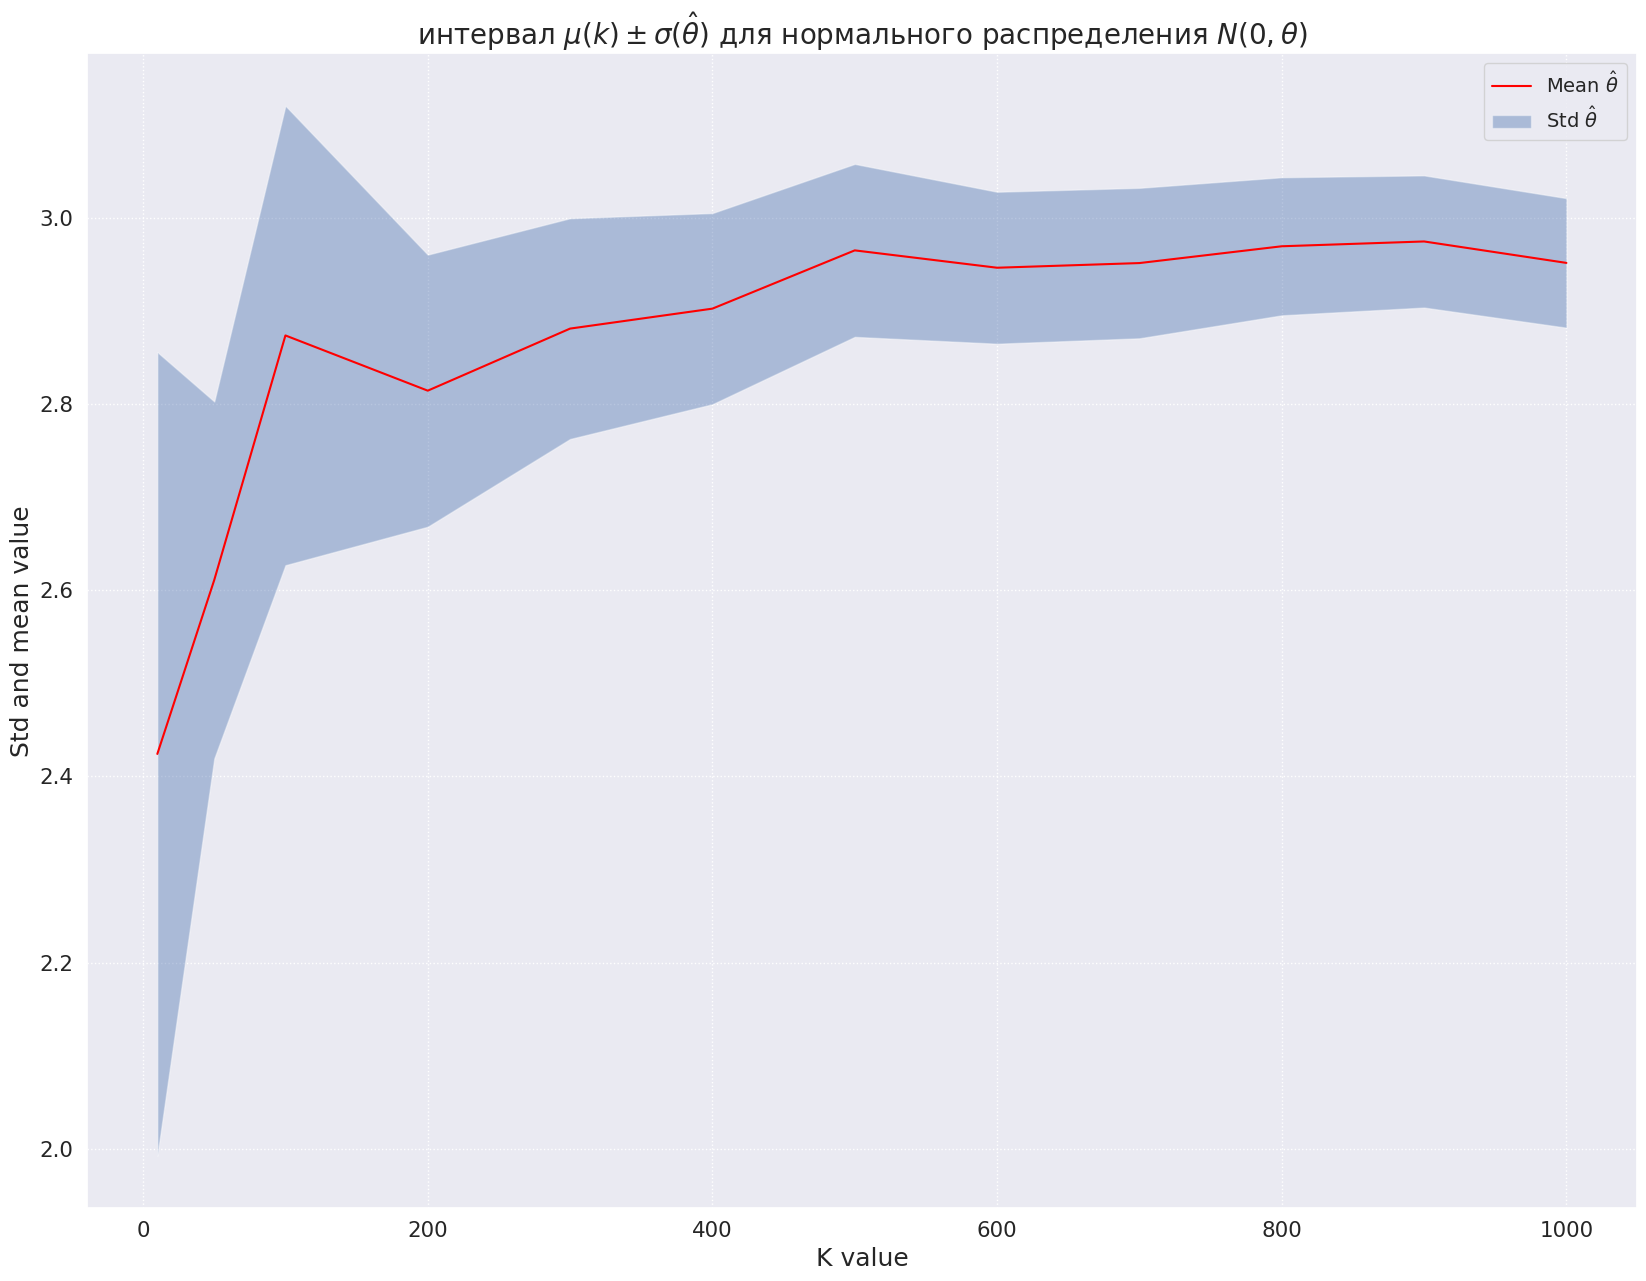

In [23]:
plt.figure(figsize=(20,15))
plt.plot(K_value, mean_boostrap, color='red', label=r'Mean $\hat\theta$')
plt.fill_between(K_value, np.array(mean_boostrap) + np.array(std_boostrap), np.array(mean_boostrap) - np.array(std_boostrap), alpha=0.4, label=r'Std $\hat\theta$')
plt.grid(ls=':')
plt.xlabel('K value', fontsize=18)
plt.ylabel('Std and mean value', fontsize=18)
plt.title(r'интервал $\mu(k) \pm \sigma(\hat\theta)$ для нормального распределения $\mathit{N}(0, \theta)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Рассмотрим равномерное распределение:

In [24]:
std_boostrap = []
mean_boostrap = []
for k in K_value:
    bootstrap_choices = [np.random.choice(sample_uniform[:k], size=k, replace=True) for i in range(k)]
    estimators = np.array([np.array(sps.uniform.fit(bootstrap_choices[i], floc=0, method="MM")) for i in range(k)])[:, 1]
    std_boostrap.append(np.std(estimators))
    mean_boostrap.append(np.mean(estimators))

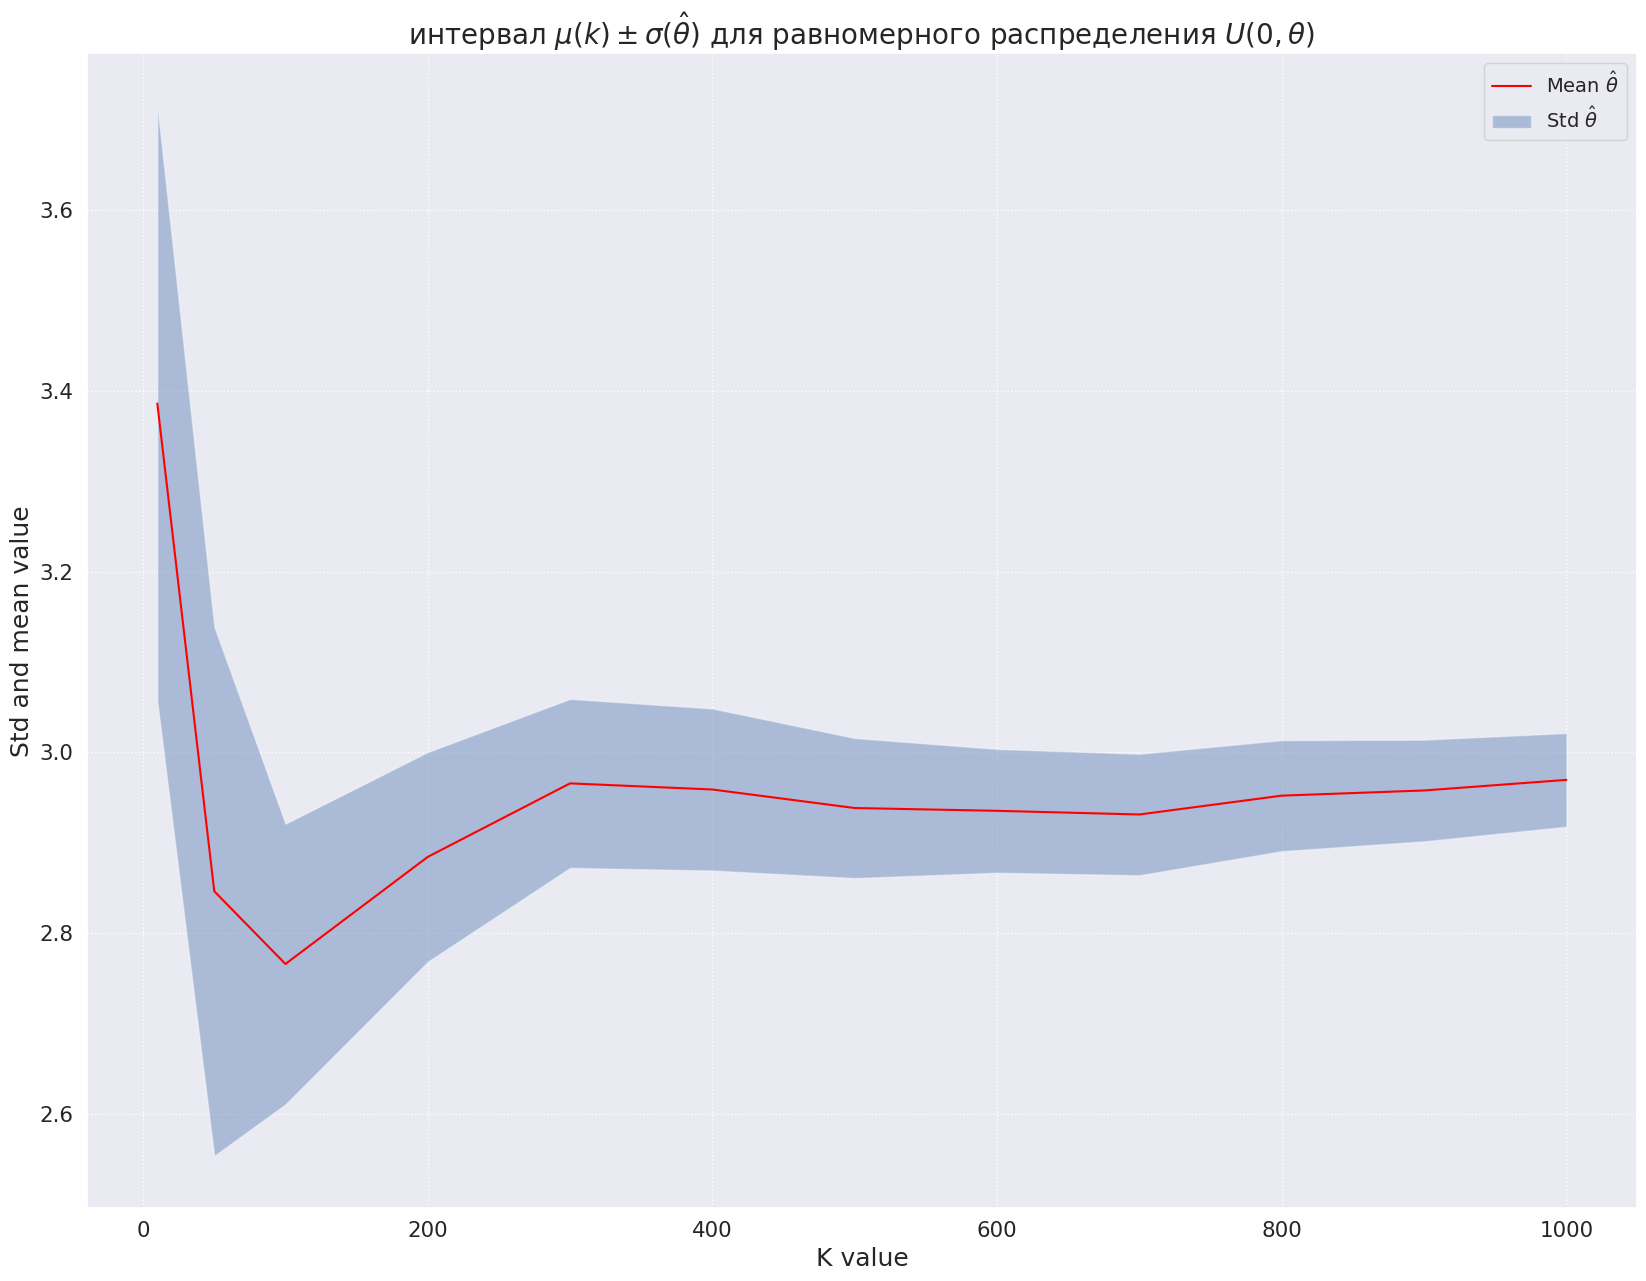

In [25]:
plt.figure(figsize=(20,15))
plt.plot(K_value, mean_boostrap, color='red', label=r'Mean $\hat\theta$')
plt.fill_between(K_value, np.array(mean_boostrap) + np.array(std_boostrap), np.array(mean_boostrap) - np.array(std_boostrap), alpha=0.4, label=r'Std $\hat\theta$')
plt.grid(ls=':')
plt.xlabel('K value', fontsize=18)
plt.ylabel('Std and mean value', fontsize=18)
plt.title(r'интервал $\mu(k) \pm \sigma(\hat\theta)$ для равномерного распределения $\mathit{U}(0, \theta)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

Рассмотрим нормальное распределение:

In [26]:
std_boostrap = []
mean_boostrap = []
for k in K_value:
    bootstrap_choices = [np.random.choice(sample_gamma[:k], size=k, replace=True) for i in range(k)]
    estimators = np.array([np.array(sps.gamma.fit(bootstrap_choices[i], fa=1, method="MM")) for i in range(k)])[:, 2]
    std_boostrap.append(np.std(estimators))
    mean_boostrap.append(np.mean(estimators))

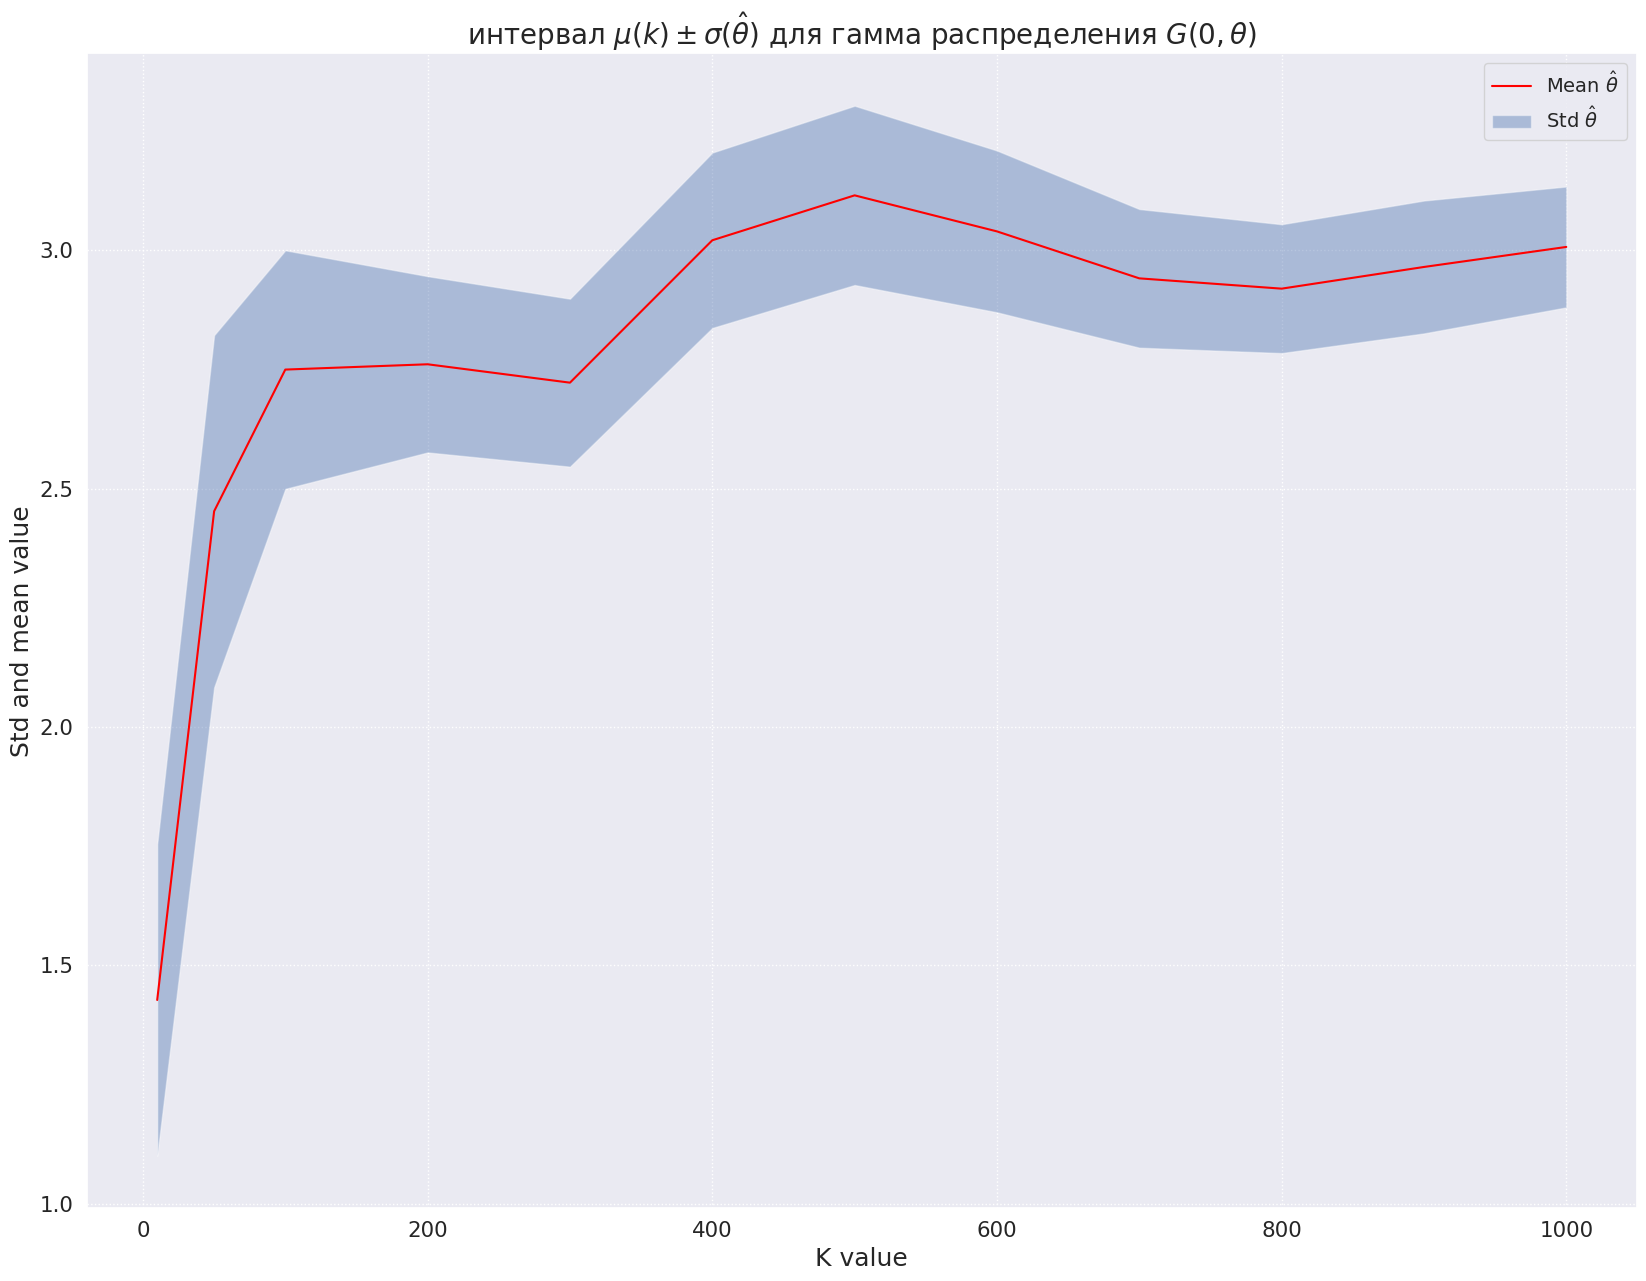

In [27]:
plt.figure(figsize=(20,15))
plt.plot(K_value, mean_boostrap, color='red', label=r'Mean $\hat\theta$')
plt.fill_between(K_value, np.array(mean_boostrap) + np.array(std_boostrap), np.array(mean_boostrap) - np.array(std_boostrap), alpha=0.4, label=r'Std $\hat\theta$')
plt.grid(ls=':')
plt.xlabel('K value', fontsize=18)
plt.ylabel('Std and mean value', fontsize=18)
plt.title(r'интервал $\mu(k) \pm \sigma(\hat\theta)$ для гамма распределения $\mathit{G}(0, \theta)$', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.show()

__Вывод__: По графикам видно, что при увеличении К оценка среднее оценки становится все ближе к инстинной оценке, значит чем больше бутстрепных выборок, тем точнее оценка. Но стоит заметить, что метод моментов хуже всего работает для гамма распределения, по графику видим что там самое большое отклонение от истинного значения $\theta$. Также при увеличении увеличении количества элементов выборки уменьшется окно дисперсии, потому что точность повышается